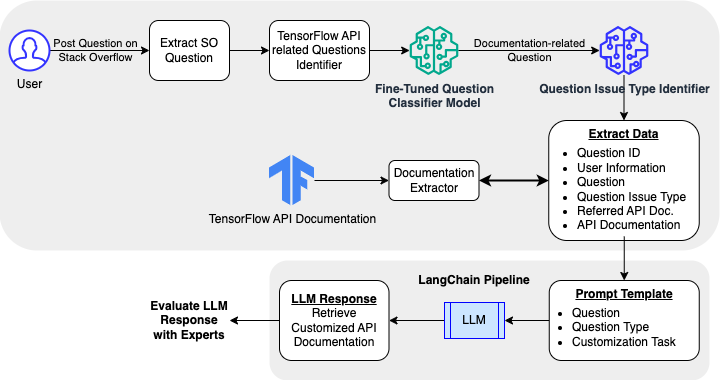

### **Questions Issue Types**

1. **Documentation Replication on Other Examples**

  - Issues related to replicating the documentation examples on other different examples.
  - **Prompt Task:** `Provide examples replicating the documentation on other examples along with explanation with respect to the question asked by the user.`

2. **Documentation Ambiguity**

  - Issues related to not understanding the content properly.
  - **Prompt Task:** `Provide step by step explanations and examples to understand the content of the documentation with respect to the question asked by the user.`

3. **Documentation Completeness**

  - Issues that mention that the documentation is incomplete or missing information.
  - **Prompt Task:** `Complete the documentation by adding the information with respect to the question asked by the user.`

4. **Documentation Replicability**

  - Issues related to replicating the documentation examples
  - **Prompt Task:** `Provide complete examples replicating the examples provided within the documentation with respect to the question asked by the user.`

5. **Inadequate Examples**

  - Issues that mention the documentation has insufficient examples.
  - **Prompt Task:** `Provide multiple complete examples to showcase its usability with respect to the question asked by the user.`

6. **Lack of Alternative Solutions**

  - Issues that mention the unavailability of alternative solutions or documentation.
  - **Prompt Task:** `Provide alternative solutions with respect to the question asked by the user.`

7. **Requesting (Additional) Documentation/ Examples**

  - Questions that request additional examples or documentations as a support.
  - **Prompt Task:** `Provide links to reliable additional documentation or examples with respect to the question asked by the user.`

### Potention GPT Models Information
Prices are per 1,000 tokens, where 1,000 tokens is about 750 words. (**`GPT-4 Turbo` is a preview version**)


| GPT Model   | Context Window  | Training Data   | Input          | Output    |
| --------    | --------        | --------        | --------       | --------  |
| GPT-4 Turbo | 128,000 Tokens  | Up to Apr 2023  | \$0.01/1K tokens | \$0.03/1K tokens|
| GPT-4 8K    |   8,192 Tokens  | Up to Sep 2021  | \$0.03/1K tokens | \$0.06/1K tokens|
| GPT-4 32K   |  32,768 Tokens  | Up to Sep 2021  | \$0.06/1K tokens | \$0.12/1K tokens|
| GPT-3.5     |  16,385 Tokens  | Up to Sep 2021  | \$0.0005/1K tokens | \$0.0020/1K tokens|


# Code

**Import Libraries**

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import os
import json
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from setfit import SetFitModel

# LangChain packages
# from langchain_openai import ChatOpenAI
# from langchain.tools import Tool
# from langchain.agents import load_tools
# from langchain.agents import initialize_agent
# from langchain.vectorstores import Chroma
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain.schema import Document
# from langchain.prompts import PromptTemplate
# from langchain.chains import LLMChain
# from langchain import hub
# from langchain.agents import create_openai_functions_agent
# from langchain.agents import AgentExecutor
# from langchain.document_loaders import DataFrameLoader, DirectoryLoader, YoutubeLoader, TextLoader


# from langchain_openai import OpenAIEmbeddings
# embedding_function = OpenAIEmbeddings(model="text-embedding-3-large")


# Include custom python modules
import lib.helper_funcs as hf
import lib.global_settings as s
import lib.api as api
import lib.utils as utils



In [2]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/sharukat@gmail.com/DocumentCustomizer")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/782057818488460', creation_time=1707424687928, experiment_id='782057818488460', last_update_time=1707927555086, lifecycle_stage='active', name='/Users/sharukat@gmail.com/DocumentCustomizer', tags={'mlflow.experiment.sourceName': '/Users/sharukat@gmail.com/DocumentCustomizer',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'sharukat@gmail.com',
 'mlflow.ownerId': '7145086246729944'}>

#### Classify Stack Overflow Questions (Documentation-related)

SQL query to extract questions based on the question IDs

```mysql
SELECT
    p.Id AS QuestionId,
    p.Title,
    p.Body,
    CONCAT('https://stackoverflow.com/questions/', p.Id) AS QuestionURL,
    p.OwnerUserId AS UserId
FROM Posts p
WHERE p.Id IN (your_list_of_question_ids_here);
```


In [3]:
tf_api_ques = pd.read_csv(os.path.join(s.DATA_PATH, "tf_api_questions_v1.csv"))
tf_api_ques['Body'] = tf_api_ques['Body'].apply(utils.text_preprocessor)
tf_api_ques

,QuestionId,Title,Body,QuestionURL,UserId
0,33617638,TensorFlow (Mac OS X): can't determine number ...,"There must be a simple setting for Mac OS X, t...",https://stackoverflow.com/questions/33617638,904032.0
1,33624048,Fail to run word embedding example in tensorfl...,I am trying to run the word embedding example ...,https://stackoverflow.com/questions/33624048,1230772.0
2,33633370,How to print the value of a Tensor object in T...,I have been using the introductory example of ...,https://stackoverflow.com/questions/33633370,4993513.0
3,33641922,conditional graph in tensorflow and for loop t...,First the broad questions: My actual use case ...,https://stackoverflow.com/questions/33641922,3688217.0
4,33648167,Why do we name variables in Tensorflow?,"In some of the places, I saw the syntax, where...",https://stackoverflow.com/questions/33648167,4165313.0
...,...,...,...,...,...
34542,76444585,Create Multivariate Normal Distribution with L...,recently I am dealing with state space model. ...,https://stackoverflow.com/questions/76444585,6657003.0
34543,76447111,where is the documentation of keras.engine.seq...,I got &lt;class 'keras.engine.sequential.Seque...,https://stackoverflow.com/questions/76447111,3646484.0
34544,76447508,How to retrain a model that was saved using th...,I am building a Neural Machine Translator for ...,https://stackoverflow.com/questions/76447508,16851318.0
34545,76447653,The output sequence is almost uniform at each ...,I'm using LSTM (python/tensorflow) to build a ...,https://stackoverflow.com/questions/76447653,11472474.0


In [4]:
doc_related = []
model = SetFitModel.from_pretrained("sharukat/so_mpnet-base_question_classifier")

#  Run inference
for index, row in tqdm(tf_api_ques.iterrows(), total=tf_api_ques.shape[0]):
    preds = model(row['Body'])
    doc_related.append(preds)
    

tf_api_ques['DocRelated'] = doc_related
tf_api_ques.head()


config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/164 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config_setfit.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

100%|██████████| 34547/34547 [1:38:30<00:00,  5.85it/s]  


,QuestionId,Title,Body,QuestionURL,UserId,DocRelated
0,33617638,TensorFlow (Mac OS X): can't determine number ...,"There must be a simple setting for Mac OS X, t...",https://stackoverflow.com/questions/33617638,904032.0,0
1,33624048,Fail to run word embedding example in tensorfl...,I am trying to run the word embedding example ...,https://stackoverflow.com/questions/33624048,1230772.0,0
2,33633370,How to print the value of a Tensor object in T...,I have been using the introductory example of ...,https://stackoverflow.com/questions/33633370,4993513.0,0
3,33641922,conditional graph in tensorflow and for loop t...,First the broad questions: My actual use case ...,https://stackoverflow.com/questions/33641922,3688217.0,0
4,33648167,Why do we name variables in Tensorflow?,"In some of the places, I saw the syntax, where...",https://stackoverflow.com/questions/33648167,4165313.0,0


In [5]:
tf_api_ques.to_csv(os.path.join(s.DATA_PATH, "tf_api_questions_v2.csv"))
tf_doc_related_ques = tf_api_ques[tf_api_ques['DocRelated'] == 1]
tf_doc_related_ques.to_csv(os.path.join(s.DATA_PATH, "tf_doc_api_questions_v0.csv"), index=False)

tf_api_ques['DocRelated'].value_counts()

DocRelated
0    32542
1     2005
Name: count, dtype: int64

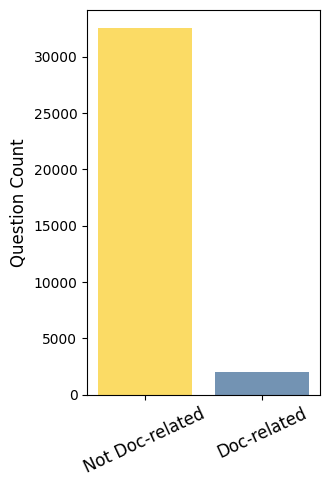

In [6]:
df = pd.read_csv(os.path.join(s.DATA_PATH, "tf_api_questions_v2.csv"))

class_counts = df["DocRelated"].value_counts()

# Extract data for plotting 
class_labels = ["Not Doc-related", "Doc-related"]
class_values = class_counts.to_numpy()


custom_colors = {
   "Not Doc-related": "#FBDB65",  # Example color for "Not Doc-related"
   "Doc-related": "#7393B3"   # Example color for "Doc-related"
}
plt.figure(figsize=(3, 5))  # Adjust figure size as needed
plt.bar(class_labels, class_values, color=[custom_colors[label] for label in class_labels])
plt.xticks(rotation=25, ha="center", fontsize=12,)  # Rotate x-axis labels for better readability
plt.ylabel("Question Count", fontdict={"fontsize":12})
# plt.title("Prevelance of TensorFlow API doc-related questions", fontdict={"fontsize":12, "fontweight":"bold"})
plt.savefig("./figures/doc-related_questions.pdf", format="pdf", bbox_inches="tight")
# Display the plot
plt.show()


In [7]:
tf_doc_related_ques

,QuestionId,Title,Body,QuestionURL,UserId,DocRelated
24,33720645,Why is this TensorFlow implementation vastly l...,As a toy example I'm trying to fit a function ...,https://stackoverflow.com/questions/33720645,1715157.0,1
26,33725159,Understanding Variable scope example in Tensor...,I was looking at the mechanics section for Ten...,https://stackoverflow.com/questions/33725159,5557105.0,1
28,33727935,How to use stop_gradient in Tensorflow,I'm wondering how to use stop_gradient in tens...,https://stackoverflow.com/questions/33727935,5565980.0,1
56,33932901,What's the purpose of tf.app.flags in TensorFlow?,"I am reading some example codes in Tensorflow,...",https://stackoverflow.com/questions/33932901,5607347.0,1
58,33943992,"In Tensorflow, how do I generate a scalar summ...",Does anyone have a minimal example of using a ...,https://stackoverflow.com/questions/33943992,5609344.0,1
...,...,...,...,...,...,...
34533,76433726,"reading and decoding a .tfrecord file, and sav...",I'm currently working on implementing a pytorc...,https://stackoverflow.com/questions/76433726,22042838.0,1
34535,76440119,Can't fold BatchNorm with Conv2D in Keras QAT ...,I'm currently trying to use Keras' Quantizatio...,https://stackoverflow.com/questions/76440119,21807405.0,1
34540,76444107,Are 'validation_steps' used if the validation_...,I was trying to use the Keras API to train a g...,https://stackoverflow.com/questions/76444107,11875606.0,1
34543,76447111,where is the documentation of keras.engine.seq...,I got &lt;class 'keras.engine.sequential.Seque...,https://stackoverflow.com/questions/76447111,3646484.0,1


In [66]:
# Merge the preprocessed text with raw question body
df1 = pd.read_csv(os.path.join(s.DATA_PATH, "tf_doc_api_questions_v0.csv"))
df1 = df1.rename(columns={'Body': 'CleanedBody'})

df2 = pd.read_csv(os.path.join(s.DATA_PATH, "tf_api_questions_v1.csv"))
df = pd.merge(df1, df2[['QuestionId', 'Body']], on='QuestionId', how='inner')

df = df[['QuestionId', 'Title', 'Body', 'CleanedBody', 'QuestionURL', 'UserId', 'DocRelated']]
df


,QuestionId,Title,Body,CleanedBody,QuestionURL,UserId,DocRelated
0,33720645,Why is this TensorFlow implementation vastly l...,<p>As a toy example I'm trying to fit a functi...,As a toy example I'm trying to fit a function ...,https://stackoverflow.com/questions/33720645,1715157.0,1
1,33725159,Understanding Variable scope example in Tensor...,<p>I was looking at the mechanics section for ...,I was looking at the mechanics section for Ten...,https://stackoverflow.com/questions/33725159,5557105.0,1
2,33727935,How to use stop_gradient in Tensorflow,<p>I'm wondering how to use <code>stop_gradien...,I'm wondering how to use stop_gradient in tens...,https://stackoverflow.com/questions/33727935,5565980.0,1
3,33932901,What's the purpose of tf.app.flags in TensorFlow?,<p>I am reading some example codes in Tensorfl...,"I am reading some example codes in Tensorflow,...",https://stackoverflow.com/questions/33932901,5607347.0,1
4,33943992,"In Tensorflow, how do I generate a scalar summ...",<p>Does anyone have a minimal example of using...,Does anyone have a minimal example of using a ...,https://stackoverflow.com/questions/33943992,5609344.0,1
...,...,...,...,...,...,...,...
2000,76433726,"reading and decoding a .tfrecord file, and sav...",<p>I'm currently working on implementing a pyt...,I'm currently working on implementing a pytorc...,https://stackoverflow.com/questions/76433726,22042838.0,1
2001,76440119,Can't fold BatchNorm with Conv2D in Keras QAT ...,<p>I'm currently trying to use Keras' Quantiza...,I'm currently trying to use Keras' Quantizatio...,https://stackoverflow.com/questions/76440119,21807405.0,1
2002,76444107,Are 'validation_steps' used if the validation_...,<p>I was trying to use the Keras API to train ...,I was trying to use the Keras API to train a g...,https://stackoverflow.com/questions/76444107,11875606.0,1
2003,76447111,where is the documentation of keras.engine.seq...,<pre><code>import tensorflow as tf\nmodel = tf...,I got &lt;class 'keras.engine.sequential.Seque...,https://stackoverflow.com/questions/76447111,3646484.0,1


In [67]:
df['APIs_from_CleanBody'] = df['CleanedBody'].str.findall(r'\btf(?:\.\w+)*').apply(set).apply(list)
df.to_csv(os.path.join(s.DATA_PATH, "tf_doc_questions_with_apis_v0.csv"), index=False)
df

,QuestionId,Title,Body,CleanedBody,QuestionURL,UserId,DocRelated,APIs_from_CleanBody
0,33720645,Why is this TensorFlow implementation vastly l...,<p>As a toy example I'm trying to fit a functi...,As a toy example I'm trying to fit a function ...,https://stackoverflow.com/questions/33720645,1715157.0,1,[]
1,33725159,Understanding Variable scope example in Tensor...,<p>I was looking at the mechanics section for ...,I was looking at the mechanics section for Ten...,https://stackoverflow.com/questions/33725159,5557105.0,1,[]
2,33727935,How to use stop_gradient in Tensorflow,<p>I'm wondering how to use <code>stop_gradien...,I'm wondering how to use stop_gradient in tens...,https://stackoverflow.com/questions/33727935,5565980.0,1,[]
3,33932901,What's the purpose of tf.app.flags in TensorFlow?,<p>I am reading some example codes in Tensorfl...,"I am reading some example codes in Tensorflow,...",https://stackoverflow.com/questions/33932901,5607347.0,1,[tf.app.flags]
4,33943992,"In Tensorflow, how do I generate a scalar summ...",<p>Does anyone have a minimal example of using...,Does anyone have a minimal example of using a ...,https://stackoverflow.com/questions/33943992,5609344.0,1,[]
...,...,...,...,...,...,...,...,...
2000,76433726,"reading and decoding a .tfrecord file, and sav...",<p>I'm currently working on implementing a pyt...,I'm currently working on implementing a pytorc...,https://stackoverflow.com/questions/76433726,22042838.0,1,"[tf.data.TFRecordDataset, tf]"
2001,76440119,Can't fold BatchNorm with Conv2D in Keras QAT ...,<p>I'm currently trying to use Keras' Quantiza...,I'm currently trying to use Keras' Quantizatio...,https://stackoverflow.com/questions/76440119,21807405.0,1,[tf]
2002,76444107,Are 'validation_steps' used if the validation_...,<p>I was trying to use the Keras API to train ...,I was trying to use the Keras API to train a g...,https://stackoverflow.com/questions/76444107,11875606.0,1,[tf.data]
2003,76447111,where is the documentation of keras.engine.seq...,<pre><code>import tensorflow as tf\nmodel = tf...,I got &lt;class 'keras.engine.sequential.Seque...,https://stackoverflow.com/questions/76447111,3646484.0,1,[]


In [70]:
xxx = pd.read_csv(os.path.join(s.DATA_PATH, "tf_doc_questions_with_apis_v1.csv"))
xxx.to_csv(os.path.join(s.DATA_PATH, "tf_doc_questions_with_apis_v0.csv"), index=False)
xxx

,QuestionId,Title,Body,CleanedBody,QuestionURL,UserId,DocRelated,APIs_from_CleanBody,Manual_Check,Unnamed: 9
0,49868782,How to use tf.argmax,"<p>I want to test the function of tf.argmax(),...","I want to test the function of tf.argmax(),but...",https://stackoverflow.com/questions/49868782,9639109.0,1,tf.argmax,tf.argmax,NaN
1,71933464,How to make true_fn of tf.cond skip a for loop...,<p>I want to use <code>tf.cond</code> to mimic...,I want to use tf.cond to mimic the python if-e...,https://stackoverflow.com/questions/71933464,4982651.0,1,tf.cond,tf.cond,NaN
2,60516977,Difficulties in understanding higher order der...,<p>Based on the example as quoted in tensorflo...,Based on the example as quoted in tensorflow's...,https://stackoverflow.com/questions/60516977,4723266.0,1,tf.custom_gradient,tf.custom_gradient,NaN
3,38810424,How does one debug NaN values in TensorFlow?,<p>I was running TensorFlow and I happen to ha...,I was running TensorFlow and I happen to have ...,https://stackoverflow.com/questions/38810424,1601580.0,1,"tf.add_check_numerics_ops', 'tf.Print",tf.add_check_numerics_ops,NaN
4,41604616,Save and load Tensorflow model,"<p>I want to save a Tensorflow (0.12.0) model,...","I want to save a Tensorflow (0.12.0) model, in...",https://stackoverflow.com/questions/41604616,3444294.0,1,"tf.add_to_collection', 'tf.get_collection",tf.add_to_collection,NaN
...,...,...,...,...,...,...,...,...,...,...
1999,76225743,TypeError: 'AutoTrackable' object is not calla...,<p>In my code I wish to create a tokenizer fro...,In my code I wish to create a tokenizer from a...,https://stackoverflow.com/questions/76225743,13871286.0,1,NaN,NaN,NaN
2000,76262758,TF2.3 - More model outputs than targets,<p>I am trying to write a model in which there...,I am trying to write a model in which there ar...,https://stackoverflow.com/questions/76262758,588959.0,1,NaN,NaN,NaN
2001,76402835,ValueError: tf.function only supports singleto...,<p>I have the following code:</p>\n<pre><code>...,I have the following code: I get the error in ...,https://stackoverflow.com/questions/76402835,14114819.0,1,NaN,NaN,NaN
2002,76412332,Save load and retrain a tensorflow model for m...,<p>I've been trying train a model for machine ...,I've been trying train a model for machine tra...,https://stackoverflow.com/questions/76412332,21164761.0,1,NaN,NaN,NaN


In [8]:
doc_related_issue_types = pd.read_csv(os.path.join(s.DATA_PATH, "doc_related_annotated_issue_types_v0.csv"))
doc_related_issue_types = doc_related_issue_types[['QuestionId', 'Issue Type']]

common_data = pd.merge(tf_doc_related_ques, doc_related_issue_types, how='inner', on='QuestionId')
annotated_data = common_data[['QuestionId', 'Title', 'Body', 'DocRelated', 'Issue Type']]
annotated_data.to_csv(os.path.join(s.DATA_PATH, "annotated_data_v0.csv"))
annotated_data


,QuestionId,Title,Body,DocRelated,Issue Type
0,34589335,How does the distorted_inputs() function in th...,I was going through the CIFAR-10 example at Te...,1,Documentation Replication on Other Examples
1,34619177,What does tf.nn.conv2d do in tensorflow?,I was looking at the docs of tensorflow about ...,1,Documentation Replication on Other Examples
2,34642595,Tensorflow Strides Argument,I am trying to understand the strides argument...,1,Documentation Ambiguity
3,34931121,Can cond support TF ops with side effects?,The (source code) documentation for tf.cond is...,1,Documentation Replicability
4,35689547,How to process single training file in parallel,I have a file train.csv that contains paths to...,1,Documentation Replication on Other Examples
...,...,...,...,...,...
537,76380927,Tensorflow decode image,I am a beginner in tensorflow and I am trainin...,1,Requesting (Additional) Documentation/Examples
538,76391276,Custom gradient for broadcasting operation,I have an operation for which I want to define...,1,Documentation Ambiguity
539,76396532,"Ragged tensors in dataset, tensorflow, how do ...","I have in my model, for fitting, and my datase...",1,Documentation Replicability
540,76444107,Are 'validation_steps' used if the validation_...,I was trying to use the Keras API to train a g...,1,Documentation Replication on Other Examples


In [11]:
annotated_data['Issue Type'].value_counts()

Issue Type
Documentation Replication on Other Examples       198
Documentation Replicability                        94
Lack of Alternative Solutions/Documentation        86
Documentation Ambiguity                            82
Inadequate Examples                                43
Requesting (Additional) Documentation/Examples     24
Documentation Completeness                         15
Name: count, dtype: int64

In [9]:
# Doc-related issue type unannotated questions
ids_to_remove = annotated_data['QuestionId'].tolist()
df_filtered = tf_doc_related_ques.drop(tf_doc_related_ques[tf_doc_related_ques['QuestionId'].isin(ids_to_remove)].index)

# Since we already have 542 annotated ones, randomly select 1000 to annotate.
sampled_df =  df_filtered.sample(n=1000, random_state=42)
sampled_df.to_csv(os.path.join(s.DATA_PATH, "sampled_issuetypes_data_v0.csv"), index=False)

In [10]:
# Preprocess only to select text
sampled_df = pd.read_csv(os.path.join(s.DATA_PATH, "sampled_issuetypes_data_v0.csv"))
# sampled_df['Body'] = sampled_df['Body'].apply(utils.text_preprocessor)
# sampled_df.to_csv(os.path.join(s.DATA_PATH, "sampled_issuetypes_data_v2.csv"))
sampled_df

,QuestionId,Title,Body,QuestionURL,UserId,DocRelated
0,70163993,Replace tf.const with tf.variable in frozen gr...,I got trouble to re-train frozen graph Due to ...,https://stackoverflow.com/questions/70163993,4457567.0,1
1,42865818,"Tensorflow Serving - ""No versions of servable""...",I've trained a model using the Getting Started...,https://stackoverflow.com/questions/42865818,3202362.0,1
2,44770980,Tensorflow - Retrieve each character in a stri...,I'm trying to retrieve the characters in a str...,https://stackoverflow.com/questions/44770980,5470522.0,1
3,49930682,Getting InvalidArgumentError in softmax_cross_...,I'm pretty new to tensorflow and trying to do ...,https://stackoverflow.com/questions/49930682,8444976.0,1
4,60974077,How to save Keras model as frozen graph?,I am working with Tensorflow 2.0 and want to s...,https://stackoverflow.com/questions/60974077,3861775.0,1
...,...,...,...,...,...,...
995,53367063,tensorflow python expected dense_input to have...,"I am a complete newbie to tensorflow, trying t...",https://stackoverflow.com/questions/53367063,10672298.0,1
996,54703128,"No gradients provided for any variable, check ...",I am trying to build a Bayesian Softmax Regres...,https://stackoverflow.com/questions/54703128,11055886.0,1
997,43284047,What is the default kernel initializer in tf.l...,The official Tensorflow API doc claims that th...,https://stackoverflow.com/questions/43284047,7833924.0,1
998,58947679,No gradients provided for any variable in tens...,I met a problem when I tried to use tensorflow...,https://stackoverflow.com/questions/58947679,10796214.0,1


#### Classify TensorFlow API documentation related question to identify issue types

#### API Documentation Smells

In [38]:
doc_smells = pd.read_csv(os.path.join(s.DATA_PATH, 'tf_doc_smells.csv'))
doc_smells = doc_smells[[
    'api_name', 'url', 'content', 'url_count', 'flesch_ease_score', 'api_method_count', 'total_words', 
    'Bloated_avg', 'Tangled_avg', 'Excessive_Structured_avg', 'Fragmented_avg']]
doc_smells


,api_name,url,content,url_count,flesch_ease_score,api_method_count,total_words,Bloated_avg,Tangled_avg,Excessive_Structured_avg,Fragmented_avg
0,tf.AggregationMethod,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>A class listing aggregation method...,0,26.67,0,71.0,0,1,0,0
1,tf.Assert,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>Asserts that the given condition i...,2,66.94,2,63.0,0,0,1,0
2,tf.CriticalSection,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>Critical section.</p>\n<p>A <code ...,1,46.47,0,289.0,1,1,0,0
3,tf.DType,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>Represents the type of the element...,10,70.39,1,139.0,0,0,1,1
4,tf.DeviceSpec,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>Represents a (possibly partial) sp...,9,51.24,0,289.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4514,tf.compat.v1.while_loop,https://www.tensorflow.org/api_docs/python/tf/...,"<p></p>\n<p>Repeat <code dir=""ltr"" translate=""...",2,60.85,2,890.0,1,0,1,0
4515,tf.compat.v1.wrap_function,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>Wraps the TF 1.x function fn into ...,5,56.55,3,214.0,1,0,1,1
4516,tf.compat.v1.xla,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>Public API for tf.xla namespace.</...,1,56.93,0,17.0,0,0,0,0
4517,tf.compat.v1.xla.experimental,https://www.tensorflow.org/api_docs/python/tf/...,<p></p>\n<p>Public API for tf.xla.experimental...,2,45.72,0,39.0,0,1,0,0


In [36]:
print(f"Bloated Threshold: {doc_smells['total_words'].mean()}")
print(f"Fragmented Threshold: {doc_smells['url_count'].mean()}")
print(f"Excessive Structure Threshold: {doc_smells['api_method_count'].mean()}")
print(f"Tangled Threshold: {doc_smells['flesch_ease_score'].mean()}")



Bloated Threshold: 141.75896414342628
Fragmented Threshold: 4.851073246293428
Excessive Structure Threshold: 0.9805266651914141
Tangled Threshold: 48.197373312679794


In [39]:
print(f"Total Bloated: {doc_smells['Bloated_avg'].sum(axis=0)}")
print(f"Total Fragmented: {doc_smells['Fragmented_avg'].sum(axis=0)}")
print(f"Total Excessive Structure: {doc_smells['Excessive_Structured_avg'].sum(axis=0)}")
print(f"Total Tangled: {doc_smells['Tangled_avg'].sum(axis=0)}")


Total Bloated: 932
Total Fragmented: 813
Total Excessive Structure: 1685
Total Tangled: 1760


In [21]:
smell_counts = {"all_zeros": 0, "only_one": 0, "two_ones": 0, "three_ones": 0, "all_ones": 0}

for index, row in doc_smells.iterrows():
  # Calculate the total smell score
  total_smell_score = row["Bloated_avg"] + row["Fragmented_avg"] + row["Excessive_Structured_avg"] + row["Tangled_avg"]
  
  # Increment count based on smell score
  smell_counts[f"all_zeros"] += 1 if total_smell_score == 0 else 0
  smell_counts[f"only_one"] += 1 if total_smell_score == 1 else 0
  smell_counts[f"two_ones"] += 1 if total_smell_score == 2 else 0
  smell_counts[f"three_ones"] += 1 if total_smell_score == 3 else 0
  smell_counts[f"all_ones"] += 1 if total_smell_score == 4 else 0

print(f"Smell Counts: {smell_counts}")


Smell Counts: {'all_zeros': 1285, 'only_one': 1867, 'two_ones': 844, 'three_ones': 457, 'all_ones': 66}


#### Persist a ChromaDB instance using the embeddings collections.

* The original document is too lengthy to seamlessly fit into the context window of the LLM. Therefore, it is necessary to divide it into smaller sections.

**Stack Overflow question and accepted answer vector database.**

In [3]:
# Load CSV file that contains TensorFlow API documentation related Stack Overflow questions with accepted answers.
df = pd.read_csv(os.path.join(s.DATA_PATH, "DocQues_AcceptedAns_Issues_v2_2018_2023.csv"))
df["context"] = ""

for index, row in df.iterrows():
  context = f"Title: {row['Title']}\n\n"
  context += f"Body: {row['Body']}\n\n"
  context += f"AcceptedAnswer: {row['AcceptedAnswer']}"
  df.loc[index, "context"] = context

df.head()

,QuestionId,Title,Body,QuestionAPI,CurrentAPI,CreationDate,AcceptedAnswer,UserID,User Reputation,QuestionURL,IssueType,context
0,76324368,Understanding tf.keras.layers.Dense(),<p>I am trying to understand why there is a di...,tf.keras.layers.Dense,tf.keras.layers.Dense,2023-05-24 14:00:25,<p>After some experimentation I realized that ...,18338104,5,https://stackoverflow.com/questions/76324368,Documentation Replication on Other Examples,Title: Understanding tf.keras.layers.Dense()\n...
1,74088086,Seed in tensorflow initializer (tf.keras.initi...,"<p>looking at tensorflow documentation (see, e...",tf.keras.initializers.GlorotNormal,tf.keras.initializers.GlorotNormal,2022-10-16 14:53:17,<p>If you go to the link you send you can read...,17788510,168,https://stackoverflow.com/questions/74088086,Documentation Replication on Other Examples,Title: Seed in tensorflow initializer (tf.kera...
2,74029376,Tensorflow custom reduction function with axis...,<p>I would like to get the value with the maxi...,-,-,2022-10-11 13:57:31,<p>It really depends on how many dimensions yo...,18159603,955,https://stackoverflow.com/questions/74029376,Lack of Alternative Solutions/Documentation,Title: Tensorflow custom reduction function wi...
3,74005009,How to create output_signature for tensorflow....,<p>I have a generator yielding data and labels...,tf.data.Dataset,tf.data.Dataset,2022-10-09 13:04:41,<p>if your datagen_row() function yields input...,2300622,1104,https://stackoverflow.com/questions/74005009,Documentation Replicability,Title: How to create output_signature for tens...
4,73165980,Tensorflow: how to feed a variable-time-step i...,<p>I have a simple X_train and Y_train data:</...,tf.data.Dataset,tf.data.Dataset,2022-07-29 11:26:49,"<p>Short answer is, you can define <code>outpu...",13454852,151,https://stackoverflow.com/questions/73165980,Documentation Ambiguity,Title: Tensorflow: how to feed a variable-time...


In [4]:
persist_df = df[["QuestionId", "context", "QuestionURL"]]
loader = DataFrameLoader(persist_df, page_content_column="context")
so_questions_answers = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
chunks = text_splitter.split_documents(so_questions_answers)

db1 = Chroma.from_documents(chunks, embedding_function, persist_directory=os.path.join(s.VECTORDB_PATH, "dataframe"))

**TensorFlow API documentation markdown files vector database.**

In [ ]:
markdown_loader = DirectoryLoader(s.DOCUMENTATION_PATH, glob="**/*.md", loader_cls=TextLoader)
markdown_docs = markdown_loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=10)
chunks = text_splitter.split_documents(markdown_docs)

db2 = Chroma.from_documents(chunks, embedding_function, persist_directory=os.path.join(s.VECTORDB_PATH, "markdown"))

**TensorFlow-related YouTube video transcripts vector database.**

In [5]:
with open (os.path.join(s.ASSETS_PATH, 'youtube_videos.json'), 'r') as file:
  urls = json.load(file)

data = []
for url in urls:
  try:
    youtube_loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
    yt_transcript = youtube_loader.load()

    details = {
      'video_id': yt_transcript[0].metadata['source'],
      'source': url,
      'title': yt_transcript[0].metadata['title'],
      'transcript': yt_transcript[0].page_content
      }
    data.append(details)
  except Exception as e:
    print(f"An errror occured with URL {url}: {e}")

transcript_df = pd.DataFrame(data)
transcript_df.head()

,video_id,source,title,transcript
0,KNAWp2S3w94,https://www.youtube.com/watch?v=KNAWp2S3w94&li...,Intro to Machine Learning (ML Zero to Hero - P...,♪ (music) ♪ You've probably heard a lot\nabout...
1,bemDFpNooA8,https://www.youtube.com/watch?v=bemDFpNooA8&li...,Basic Computer Vision with ML (ML Zero to Hero...,"♪ (music) ♪ Hi, everyone, and welcome to episo..."
2,x_VrgWTKkiM,https://www.youtube.com/watch?v=x_VrgWTKkiM&li...,Introducing convolutional neural networks (ML ...,"♪ (music) ♪ Hi, and welcome to episode three\n..."
3,u2TjZzNuly8,https://www.youtube.com/watch?v=u2TjZzNuly8&li...,Build an image classifier (ML Zero to Hero - P...,"♪ (intro music) ♪ Hi, everybody, and welcome t..."
4,fNxaJsNG3-s,https://www.youtube.com/watch?v=fNxaJsNG3-s&li...,Natural Language Processing - Tokenization (NL...,"LAURENCE MORONEY: Hi, and\nwelcome to this ser..."


In [6]:
transcript_loader = DataFrameLoader(transcript_df, page_content_column="transcript")
yt_transcripts = transcript_loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
chunks = text_splitter.split_documents(yt_transcripts)

db3 = Chroma.from_documents(chunks, embedding_function, persist_directory=os.path.join(s.VECTORDB_PATH, "transcripts"))

#### Query Stack Overflow using the API
We can easily get the responses we need when we include many responses, but this doesn't work well with LLMs. The recall performance for LLMs decreases as we add more into the context windows - we call this excessive filling of thhe context widnows "context stuffing".

Fortunately, reranking offers us a solution to this by helping to find the most relevant responses (e.g top-3), and pull then into a smaller set of results to be given to the LLM.

## Pipeline Elements

#### 6. Pipeline Element: Prompt Template

In [3]:
template = """
Use the following pieces of context as a support to answer the question at the end.  If cannot find relevant context, please think rationally and answer from your own knowledge base.

{context}

Below is a Stack Overflow question posted by a user related to documentation replication on other examples.

Question Title: {title}
Question Body: {body}

The above question is related to {issue_type} issue type. And below is the definition of that issue type.

{issue_type} definition:
{definition}


Moreover, the question is related to the TensorFlow {api_name} API documentation. Below is the up-to-date TensorFlow API documentation in markdown format:

{documentation}


{task}. Moreover, provide the response in markdown format in order to add that into the original documentation as a new section "Alternative Resources". This customization should avoid any questions like this in future.
"""

In [4]:
PROMPT = PromptTemplate(
    template=template,
    input_variables=['context', 'title','body', 'issue_type','definition', 'documentation', 'task'])

#### 7. Pipeline Element: LangChain Agent

In [2]:
agent_llm = ChatOpenAI(model_name="gpt-3.5-turbo-0125", temperature=0)
agent_prompt = hub.pull("hwchase17/openai-functions-agent")
search = TavilySearchResults()
tools = [search]
agent = create_openai_functions_agent(agent_llm, tools, agent_prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools)

#### 8. Pipeline Element: LangChain Pipeline

In [6]:
mlflow_callback = MlflowCallbackHandler(experiment="/Users/sharukat@gmail.com/DocumentCustomizer",tracking_uri="databricks")
llm = ChatOpenAI(model_name="gpt-3.5-turbo-0125", temperature=0, callbacks=[mlflow_callback], verbose=True,)
synopsis_chain = LLMChain(llm=llm, prompt=PROMPT, callbacks=[mlflow_callback])

## Experiments

In [7]:
question_queries = pd.read_csv(os.path.join(s.DATA_PATH, "DocQues_NoAns_Issues_v3_2020_2023.csv"))
question_queries.head()

,QuestionId,Title,Body,QuestionsAPI,CurrentAPI,CreationDate,UserId,UserReputation,QuestionURL,IssueType
0,76447508,How to retrain a model that was saved using th...,<p>I am building a Neural Machine Translator f...,tf.saved_model.load,tf.saved_model.load,2023-04-17 23:39:34,16851318,41,https://stackoverflow.com/questions/76447508,Inadequate Examples
1,76396532,"Ragged tensors in dataset, tensorflow, how do ...","<p>I have</p>\n<pre><code>def call (self, inpu...",tf.data.Dataset,tf.data.Dataset,2023-04-12 14:26:12,13154958,1,https://stackoverflow.com/questions/76396532,Documentation Replicability
2,76391276,Custom gradient for broadcasting operation,<p>I have an operation for which I want to def...,tf.custom_gradient,tf.custom_gradient,2023-04-05 13:00:20,1782792,58906,https://stackoverflow.com/questions/76391276,Documentation Ambiguity
3,76380927,Tensorflow decode image,<p>I am a beginner in tensorflow and I am trai...,tf.io.decode_image,tf.io.decode_image,2023-03-05 8:02:03,15460221,11,https://stackoverflow.com/questions/76380927,Requesting (Additional) Documentation/Examples
4,76244268,Tensorflow: Build new model from input and mid...,<p>I'm trying to build <code>new_model</code> ...,tf.keras.applications.efficientnet_v2,tf.keras.applications.efficientnet_v2,2023-03-04 23:59:16,2103321,75,https://stackoverflow.com/questions/76244268,Inadequate Examples


In [9]:
def select_rows(group):
    return group.head(5)

result_df = question_queries.groupby('IssueType').apply(select_rows).reset_index(drop=True)
result_df

/var/folders/x7/c7r5kc051js_fytcq8jbvt040000gp/T/ipykernel_73229/3603017155.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = question_queries.groupby('IssueType').apply(select_rows).reset_index(drop=True)


,QuestionId,Title,Body,QuestionsAPI,CurrentAPI,CreationDate,UserId,UserReputation,QuestionURL,IssueType
0,76391276,Custom gradient for broadcasting operation,<p>I have an operation for which I want to def...,tf.custom_gradient,tf.custom_gradient,2023-04-05 13:00:20,1782792,58906,https://stackoverflow.com/questions/76391276,Documentation Ambiguity
1,76153107,Difference between tf.Module and tf.keras.Model,<p>I know both <code>tf.Module</code> and <cod...,tf.Module,tf.Module,2023-02-16 21:44:50,21760922,33,https://stackoverflow.com/questions/76153107,Documentation Ambiguity
2,75996642,Is there a good equivalent of pandas' `apply` ...,<p><strong>BACKGROUND</strong></p>\n<p>The use...,tf.py_function,tf.py_function,2022-11-14 15:44:35,5640161,791,https://stackoverflow.com/questions/75996642,Documentation Ambiguity
3,74434308,Setting only global level seed gives same outp...,<p>I am testing out the <code>tf.random.set_se...,tf.random.set_seed,tf.random.set_seed,2021-06-28 11:48:57,7422352,5021,https://stackoverflow.com/questions/74434308,Documentation Ambiguity
4,71619495,Image normalization by tf.image.convert_image_...,<p>According to documentation <code>tf.image.c...,tf.image.convert_image_dtype,tf.image.convert_image_dtype,2020-12-28 17:31:25,5094589,915,https://stackoverflow.com/questions/71619495,Documentation Ambiguity
5,73794766,what is the meaning of axis=-1 in tf.keras.lay...,<p>I'm trying to learn deep learning using ker...,tf.keras.layers.Normalization,tf.keras.layers.Normalization,2021-04-22 10:07:35,19986715,1,https://stackoverflow.com/questions/73794766,Documentation Completeness
6,76396532,"Ragged tensors in dataset, tensorflow, how do ...","<p>I have</p>\n<pre><code>def call (self, inpu...",tf.data.Dataset,tf.data.Dataset,2023-04-12 14:26:12,13154958,1,https://stackoverflow.com/questions/76396532,Documentation Replicability
7,75640862,tf.py_function is only for Eager Mode?,<p>Is <code>tf.py_function</code> only for Eag...,tf.py_function,tf.py_function,2022-06-27 12:56:46,4281353,20088,https://stackoverflow.com/questions/75640862,Documentation Replicability
8,75639137,TF1 to TF2 migration,<p>Hello I am new to tensorflow and I am worki...,tf.compat.v1.placeholder,tf.compat.v1.placeholder,2022-05-21 11:25:40,15822972,101,https://stackoverflow.com/questions/75639137,Documentation Replicability
9,75478235,tf.image.ssim() not accepting 'return_index_ma...,<p>The documentation for Tensorflow's <a href=...,tf.image.ssim,tf.image.ssim,2022-02-28 8:05:44,20324823,1,https://stackoverflow.com/questions/75478235,Documentation Replicability


**Load the vector database**

In [9]:
so_vector_db = Chroma(persist_directory=os.path.join(s.VECTORDB_PATH,"dataframe"), embedding_function=embedding_function)
# tf_vector_db = Chroma(persist_directory=os.path.join(s.VECTORDB_PATH,"markdown"), embedding_function=embedding_function)
yt_vector_db = Chroma(persist_directory=os.path.join(s.VECTORDB_PATH,"transcripts"), embedding_function=embedding_function)


In [ ]:
# 'context', 'title','body', 'issue_type','definition', 'documentation', 'task'
for index, row in result_df.iterrows():
    try:
        so_with_score = so_vector_db.similarity_search_with_relevance_scores(row['Body'], k=3)
        yt_with_score = yt_vector_db.similarity_search_with_relevance_scores(row['Body'], k=3)

        docs = []
        video_urls = []
        # Obtain semantic similarity with the score with respect to the query (SO question)
        for doc, score in so_with_score:
            if score > 0.6:
                docs.append(doc.page_content)

        # Execute langchain agent to call Tavily search API using question title as the query
        res = agent_executor.invoke({"input": row['Title']})
        docs.append(res["output"])
        
        for script, score in yt_with_score:
            if score > 0.6:
                video_urls.append(doc.page_content)

        issue_type = row['IssueType']
        definition, task = hf.prompt_task(issue_type)
        documentation = hf.read_markdown_file(row['CurrentAPI'])

        prompts = [
            {
                "context" : '\n'.join(docs),
                "title" : row['Title'],
                "body" : row['Body'],
                "issue_type" : issue_type,
                "definition" : definition,
                "api_name":row['CurrentAPI'],
                "documentation": documentation,
                "task": task,
            },
        ]

        synopsis_chain.apply(prompts)
        mlflow_callback.flush_tracker(synopsis_chain)
    except:
        pass

In [26]:
from langchain import hub
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'chat_history': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]], 'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant')), MessagesPlaceholder(variable_name='chat_history', optional=True), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')), MessagesPlaceholder(

In [25]:
val = 'Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}'
print(val)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [21]:
from langchain_core.prompts import PromptTemplate

template = '''You are an expert at scraping websites. Your task is to web scrape a given URL and extract all the code 
present on that page, as well as extract relevant context from the description of the webpage.

You have access to the following tools:

{tools}

In order to use a tool, you can use <tool></tool> and <tool_input></tool_input> tags. You will then get back a response in the form <observation></observation>
For example, if you have a tool called 'search' that could run a google search, in order to search for the weather in SF you would respond:

<tool>search</tool><tool_input>weather in SF</tool_input>
<observation>64 degrees</observation>

When you are done, respond with a final answer between <final_answer></final_answer>. For example:

<final_answer>The weather in SF is 64 degrees</final_answer>

Begin!

URL: {input}
{agent_scratchpad}'''
prompt = PromptTemplate.from_template(template)
prompt

PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tools'], template="You are an expert at scraping websites. Your task is to web scrape a given URL and extract all the code \npresent on that page, as well as extract relevant context from the description of the webpage.\n\nYou have access to the following tools:\n\n{tools}\n\nIn order to use a tool, you can use <tool></tool> and <tool_input></tool_input> tags. You will then get back a response in the form <observation></observation>\nFor example, if you have a tool called 'search' that could run a google search, in order to search for the weather in SF you would respond:\n\n<tool>search</tool><tool_input>weather in SF</tool_input>\n<observation>64 degrees</observation>\n\nWhen you are done, respond with a final answer between <final_answer></final_answer>. For example:\n\n<final_answer>The weather in SF is 64 degrees</final_answer>\n\nBegin!\n\nURL: {input}\n{agent_scratchpad}")

In [1]:
from components.AIWebSearch.cohere_rag_retriever import relevant_context_retriever
from doc_customizer_llm.components.QuestionSummarizer.summarize import question_summarizer

title = "TF1 to TF2 migration"
body = """"
    <p>Hello I am new to tensorflow and I am working on a code that I would like to migrate from tensorflow 1 to 2. I have this line of code:</p>
    <pre><code>x1 = tf.compat.v1.placeholder(tf.float32, [], name=&quot;x1&quot;)
    </code></pre>
    <p>As mentioned in <a href="https://www.tensorflow.org/api_docs/python/tf/compat/v1/placeholder" rel="nofollow noreferrer">https://www.tensorflow.org/api_docs/python/tf/compat/v1/placeholder</a>, I should use <code>keras.Input</code>. But even when specifying the shape, I can't have the same tensor as with compat.v1:</p>
    <pre><code>x2 = tf.keras.Input(shape=[], dtype=tf.float32, name=&quot;x2&quot;)
    </code></pre>
    <p>To check the shape I use <code>tf.shape(x1)</code> or <code>tf.shape(x2)</code>, but the shapes are not the same. Could anyone explain to me how to have, in TF2, the same shape as in TF1 ?
    Thanks and regards</p>
"""
api_name = "tf.compat.v1.placeholder"

question_result = question_summarizer(title, body)
intent = question_result[0]['text']
model_response, docs, urls = relevant_context_retriever(intent)

Identifying intent of the Stack Overflow question based on the question body......
Completed Successfully

Retrieving relevant context from web using Cohere RAG Retriever....
Completed Successfully



In [5]:
intent

'The user is seeking guidance on how to correctly migrate TensorFlow 1 code to TensorFlow 2, specifically on how to replicate the functionality and output of the `tf.compat.v1.placeholder` with `tf.keras.Input` in terms of tensor shape. They are looking for an explanation or solution that would allow them to achieve the same tensor shape in TensorFlow 2 as they had in TensorFlow 1, despite having already attempted to follow the official TensorFlow documentation.'

In [3]:
model_response

"To migrate TensorFlow 1 code to TensorFlow 2, follow these steps:\n1. Run an automated script to convert your TF1.x API usage to `tf.compat.v1`.\n2. Remove old `tf.contrib.layers` and replace them with TF Slim symbols.\n3. Rewrite your TF1.x model forward passes to run in TF2 with eager execution enabled.\n4. Validate the accuracy and numerical correctness of your migrated code.\n5. Upgrade your training, evaluation and model saving code to TF2 equivalents. \n6. (Optional) Migrate your TF2-compatible `tf.compat.v1` APIs including TF Slim usage to idiomatic TF2 APIs.\n\nIn TensorFlow 2, the `tf.keras.Input` produces a symbolic tensor-like object, similar to a placeholder. Here's an example of how to convert this:\n```\ntf.placeholder(tf.float32, [None, n, p])\n```\n\n becomes\n\n```\ntf.keras.Input(shape=(32,))\n```\nThe shape parameter is required and should be set to match the shape of your tensor.\n\nTensorFlow 2 also introduces `tf.function`, which allows you to convert data-depend

In [2]:
docs

[Document(page_content='Copyright 2018 The TensorFlow Authors.\n\n#@title Licensed under the Apache License, Version 2.0 (the "License"); # you may not use this file except in compliance with the License. # You may obtain a copy of the License at # # https://www.apache.org/licenses/LICENSE-2.0 # # Unless required by applicable law or agreed to in writing, software # distributed under the License is distributed on an "AS IS" BASIS, # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. # See the License for the specific language governing permissions and # limitations under the License.\n\nMigrate your TensorFlow 1 code to TensorFlow 2\n\nView on TensorFlow.org\n\nView source on GitHub\n\nThis doc for users of low level TensorFlow APIs. If you are using the high level APIs (tf.keras) there may be little or no action you need to take to make your code fully TensorFlow 2.0 compatible:\n\nCheck your optimizer\'s default learning rate.\n\nNote that the "name" that metric

# Multi-class Classification Training Data

In [3]:
annotated_data = pd.read_csv(os.path.join(s.DATA_PATH, "tf_doc_questions_with_apis_v1.csv"))
annotated_data

,QuestionId,Title,Body,CleanedBody,QuestionURL,UserId,DocRelated,Manual_Check
0,49868782,How to use tf.argmax,"<p>I want to test the function of tf.argmax(),...","I want to test the function of tf.argmax(),but...",https://stackoverflow.com/questions/49868782,9639109.0,1,tf.argmax
1,71933464,How to make true_fn of tf.cond skip a for loop...,<p>I want to use <code>tf.cond</code> to mimic...,I want to use tf.cond to mimic the python if-e...,https://stackoverflow.com/questions/71933464,4982651.0,1,tf.cond
2,60516977,Difficulties in understanding higher order der...,<p>Based on the example as quoted in tensorflo...,Based on the example as quoted in tensorflow's...,https://stackoverflow.com/questions/60516977,4723266.0,1,tf.custom_gradient
3,61946509,tf.estimator input_fn and eager mode,<p>I tried to use <code>numpy</code> inside <c...,I tried to use numpy inside cnn_model.evaluate...,https://stackoverflow.com/questions/61946509,12997689.0,1,NaN
4,62211822,TF2 Keras - Feature Engineering in Keras saved...,<p>The Tensorflow 2 documentation for preproce...,The Tensorflow 2 documentation for preprocessi...,https://stackoverflow.com/questions/62211822,9334184.0,1,NaN
...,...,...,...,...,...,...,...,...
1433,49686860,Side effect in tf.while_loop,<p>I am currently having a hard time trying to...,I am currently having a hard time trying to un...,https://stackoverflow.com/questions/49686860,2697831.0,1,"tf.while_loop', 'tf.Variables"
1434,63908516,Storing Trainable Values in TensorArray for Wh...,<p>I'm working on a small Tensorflow model usi...,I'm working on a small Tensorflow model using ...,https://stackoverflow.com/questions/63908516,4821136.0,1,"tf.while_loop', 'tf.while_loops"
1435,39133312,Why does setting an initialization value preve...,<p>I get an exception when I try to run the fo...,I get an exception when I try to run the follo...,https://stackoverflow.com/questions/39133312,38626.0,1,tf.zeros
1436,47951994,Unable to print tf.zeros in tensorflow,<pre><code>weights = tf.Variable(tf.truncated_...,This is a part of the code I encountered to mi...,https://stackoverflow.com/questions/47951994,8259521.0,1,tf.zeros


In [5]:
annotated_issue_types = pd.read_csv(os.path.join(s.DATA_PATH, "annotated_issue_types.csv"))
annotated_issue_types

,QuestionId,Title,Body,QuestionURL,UserId,DocRelated,Issue Type
0,60974077,How to save Keras model as frozen graph?,I am working with Tensorflow 2.0 and want to s...,https://stackoverflow.com/questions/60974077,3861775.0,1,Requesting (Additional) Documentation/Examples
1,58918770,Tenforflow Sparse Arithmetic,Hi I'm learning tensorflow right now and I am ...,https://stackoverflow.com/questions/58918770,3324507.0,1,Requesting (Additional) Documentation/Examples
2,63063260,Extracting features from EfficientNet Tensorflow,I have a CNN model trained using EfficientNetB...,https://stackoverflow.com/questions/63063260,5197636.0,1,Requesting (Additional) Documentation/Examples
3,43779129,Store a tf.Saver.save checkpoint in a variable...,I am using Tensorflow and storing the current ...,https://stackoverflow.com/questions/43779129,921563.0,1,Requesting (Additional) Documentation/Examples
4,39112622,How do I set TensorFlow RNN state when state_i...,I have written an RNN language model using Ten...,https://stackoverflow.com/questions/39112622,1120370.0,1,Requesting (Additional) Documentation/Examples
...,...,...,...,...,...,...,...
869,70294847,Low accuracy using functional API + CNN and CI...,I'm new to using CNNs but I'm trying to make o...,https://stackoverflow.com/questions/70294847,12379067.0,1,Documentation Ambiguity
870,52785827,Run 1-D Conv using tensorflow,I'm a beginner in TensorFlow. I want to train ...,https://stackoverflow.com/questions/52785827,8115171.0,1,Documentation Ambiguity
871,54703128,"No gradients provided for any variable, check ...",I am trying to build a Bayesian Softmax Regres...,https://stackoverflow.com/questions/54703128,11055886.0,1,Documentation Ambiguity
872,43284047,What is the default kernel initializer in tf.l...,The official Tensorflow API doc claims that th...,https://stackoverflow.com/questions/43284047,7833924.0,1,Documentation Ambiguity


In [24]:
df = pd.merge(annotated_data, annotated_issue_types[['QuestionId', 'Issue Type']], on='QuestionId')
df = df[["QuestionId", "Manual_Check", "Title", "Body", "CleanedBody", "QuestionURL", "UserId", "Issue Type"]]
df


,QuestionId,Manual_Check,Title,Body,CleanedBody,QuestionURL,UserId,Issue Type
0,49868782,tf.argmax,How to use tf.argmax,"<p>I want to test the function of tf.argmax(),...","I want to test the function of tf.argmax(),but...",https://stackoverflow.com/questions/49868782,9639109.0,Documentation Replication on Other Examples
1,55298323,NaN,TensorFlow 2.0 returns unexpected output on dt...,<p>The following code should output the gradie...,The following code should output the gradient ...,https://stackoverflow.com/questions/55298323,3809616.0,Requesting (Additional) Documentation/Examples
2,49505986,NaN,How do i get the VALUES of trainable variables...,<p>I want to get the values of the variables f...,I want to get the values of the variables from...,https://stackoverflow.com/questions/49505986,3496060.0,Requesting (Additional) Documentation/Examples
3,41156460,NaN,tensorflow doing gradients on sparse variable,<p>I am trying to train a sparse variable in t...,I am trying to train a sparse variable in tens...,https://stackoverflow.com/questions/41156460,6233298.0,Inadequate Examples
4,54282753,NaN,How to input 2d numpy array into Tensorflow? (...,<p>I'm new to Tensorflow and I'm trying to und...,I'm new to Tensorflow and I'm trying to unders...,https://stackoverflow.com/questions/54282753,9721336.0,Requesting (Additional) Documentation/Examples
...,...,...,...,...,...,...,...,...
576,44569219,tf.where,Tensorflow: can one prevent one branch of tf.w...,<p>I'm working on an encoder-decoder setup. I ...,I'm working on an encoder-decoder setup. I wan...,https://stackoverflow.com/questions/44569219,8166504.0,Requesting (Additional) Documentation/Examples
577,49286590,tf.while_loop,tf.while_loop only makes only one loop,<p>After days of trying to apply a <code>tf.wh...,"After days of trying to apply a tf.while_loop,...",https://stackoverflow.com/questions/49286590,1971741.0,Documentation Ambiguity
578,42909692,tf.while_loop,"Tensorflow error using while_loop: ""List of Te...","<p>I'm getting a TypeError(""List of Tensors wh...","I'm getting a TypeError(""List of Tensors when ...",https://stackoverflow.com/questions/42909692,7643546.0,Requesting (Additional) Documentation/Examples
579,43457543,"tf.while_loop', 'tf.map_fn', 'tf.scan",Building dynamic_rnn from scratch in tensorflow,<p>I am coding rnn similar to dynamic_rnn prov...,I am coding rnn similar to dynamic_rnn provide...,https://stackoverflow.com/questions/43457543,7492728.0,Requesting (Additional) Documentation/Examples


In [22]:
doc_related_issue_types = pd.read_csv(os.path.join(s.DATA_PATH, "annotated_data_v0.csv"))
# doc_related_issue_types.drop(columns=['Unnamed: 0', 'Body', 'DocRelated'], axis=1, inplace=True)
# pre_annotated_issue_types = pd.merge(doc_related_issue_types, annotated_data[['QuestionId', 'Body', 'CleanedBody','QuestionURL', 'UserId']], on='QuestionId')
# pre_annotated_issue_types = pre_annotated_issue_types[["QuestionId", "Title", "Body", "CleanedBody", "QuestionURL", "UserId", "Issue Type"]]
# pre_annotated_issue_types
doc_related_issue_types

,Unnamed: 0,QuestionId,Title,Body,DocRelated,Issue Type
0,0,34589335,How does the distorted_inputs() function in th...,I was going through the CIFAR-10 example at Te...,1,Documentation Replication on Other Examples
1,1,34619177,What does tf.nn.conv2d do in tensorflow?,I was looking at the docs of tensorflow about ...,1,Documentation Replication on Other Examples
2,2,34642595,Tensorflow Strides Argument,I am trying to understand the strides argument...,1,Documentation Ambiguity
3,3,34931121,Can cond support TF ops with side effects?,The (source code) documentation for tf.cond is...,1,Documentation Replicability
4,4,35689547,How to process single training file in parallel,I have a file train.csv that contains paths to...,1,Documentation Replication on Other Examples
...,...,...,...,...,...,...
537,537,76380927,Tensorflow decode image,I am a beginner in tensorflow and I am trainin...,1,Requesting (Additional) Documentation/Examples
538,538,76391276,Custom gradient for broadcasting operation,I have an operation for which I want to define...,1,Documentation Ambiguity
539,539,76396532,"Ragged tensors in dataset, tensorflow, how do ...","I have in my model, for fitting, and my datase...",1,Documentation Replicability
540,540,76444107,Are 'validation_steps' used if the validation_...,I was trying to use the Keras API to train a g...,1,Documentation Replication on Other Examples


In [21]:
issue_type_classifier_train_data = pd.concat([df, pre_annotated_issue_types])
issue_type_classifier_train_data = issue_type_classifier_train_data.drop_duplicates(subset='QuestionId', keep='first')

issue_type_classifier_train_data.to_csv(os.path.join(s.DATA_PATH, "issue_type_train_data.csv"), index=False)
issue_type_classifier_train_data

,QuestionId,Title,Body,CleanedBody,QuestionURL,UserId,Issue Type
0,49868782,How to use tf.argmax,"<p>I want to test the function of tf.argmax(),...","I want to test the function of tf.argmax(),but...",https://stackoverflow.com/questions/49868782,9639109.0,Documentation Replication on Other Examples
1,55298323,TensorFlow 2.0 returns unexpected output on dt...,<p>The following code should output the gradie...,The following code should output the gradient ...,https://stackoverflow.com/questions/55298323,3809616.0,Requesting (Additional) Documentation/Examples
2,49505986,How do i get the VALUES of trainable variables...,<p>I want to get the values of the variables f...,I want to get the values of the variables from...,https://stackoverflow.com/questions/49505986,3496060.0,Requesting (Additional) Documentation/Examples
3,41156460,tensorflow doing gradients on sparse variable,<p>I am trying to train a sparse variable in t...,I am trying to train a sparse variable in tens...,https://stackoverflow.com/questions/41156460,6233298.0,Inadequate Examples
4,54282753,How to input 2d numpy array into Tensorflow? (...,<p>I'm new to Tensorflow and I'm trying to und...,I'm new to Tensorflow and I'm trying to unders...,https://stackoverflow.com/questions/54282753,9721336.0,Requesting (Additional) Documentation/Examples
...,...,...,...,...,...,...,...
500,76380927,Tensorflow decode image,<p>I am a beginner in tensorflow and I am trai...,I am a beginner in tensorflow and I am trainin...,https://stackoverflow.com/questions/76380927,15460221.0,Requesting (Additional) Documentation/Examples
501,76391276,Custom gradient for broadcasting operation,<p>I have an operation for which I want to def...,I have an operation for which I want to define...,https://stackoverflow.com/questions/76391276,1782792.0,Documentation Ambiguity
502,76396532,"Ragged tensors in dataset, tensorflow, how do ...","<p>I have</p>\n<pre><code>def call (self, inpu...","I have in my model, for fitting, and my datase...",https://stackoverflow.com/questions/76396532,13154958.0,Documentation Replicability
503,76444107,Are 'validation_steps' used if the validation_...,<p>I was trying to use the Keras API to train ...,I was trying to use the Keras API to train a g...,https://stackoverflow.com/questions/76444107,11875606.0,Documentation Replication on Other Examples


In [19]:
num_unique_ids = issue_type_classifier_train_data['QuestionId'].nunique()
print(num_unique_ids)

1085


In [23]:
ddff = pd.read_csv(os.path.join(s.DATA_PATH, "DocQues_AcceptedAns_Issues_v2_2018_2023.csv"))
ddff

,QuestionId,Title,Body,QuestionAPI,CurrentAPI,CreationDate,AcceptedAnswer,UserID,User Reputation,QuestionURL,IssueType
0,76324368,Understanding tf.keras.layers.Dense(),<p>I am trying to understand why there is a di...,tf.keras.layers.Dense,tf.keras.layers.Dense,2023-05-24 14:00:25,<p>After some experimentation I realized that ...,18338104,5,https://stackoverflow.com/questions/76324368,Documentation Replication on Other Examples
1,74088086,Seed in tensorflow initializer (tf.keras.initi...,"<p>looking at tensorflow documentation (see, e...",tf.keras.initializers.GlorotNormal,tf.keras.initializers.GlorotNormal,2022-10-16 14:53:17,<p>If you go to the link you send you can read...,17788510,168,https://stackoverflow.com/questions/74088086,Documentation Replication on Other Examples
2,74029376,Tensorflow custom reduction function with axis...,<p>I would like to get the value with the maxi...,-,-,2022-10-11 13:57:31,<p>It really depends on how many dimensions yo...,18159603,955,https://stackoverflow.com/questions/74029376,Lack of Alternative Solutions/Documentation
3,74005009,How to create output_signature for tensorflow....,<p>I have a generator yielding data and labels...,tf.data.Dataset,tf.data.Dataset,2022-10-09 13:04:41,<p>if your datagen_row() function yields input...,2300622,1104,https://stackoverflow.com/questions/74005009,Documentation Replicability
4,73165980,Tensorflow: how to feed a variable-time-step i...,<p>I have a simple X_train and Y_train data:</...,tf.data.Dataset,tf.data.Dataset,2022-07-29 11:26:49,"<p>Short answer is, you can define <code>outpu...",13454852,151,https://stackoverflow.com/questions/73165980,Documentation Ambiguity
...,...,...,...,...,...,...,...,...,...,...,...
121,49418325,"Use ""tf.contrib.factorization.KMeansClustering""","<p>Referring to this Link, <a href=""https://gi...",-,-,2018-03-21 23:47:33,<blockquote>\n <p>My question is why would th...,7270211,159,https://stackoverflow.com/questions/49418325,Inadequate Examples
122,49370940,One hot encoding characters,<p>Is there a possibilty to one-hot encode cha...,tf.keras.preprocessing.text.one_hot,tf.keras.preprocessing.text.one_hot,2018-03-19 19:30:14,"<p>I found a nice answer based on pure python,...",3921232,607,https://stackoverflow.com/questions/49370940,Documentation Ambiguity
123,48914952,num_buckets as a parameter in a tensorflow fea...,<p>Currently Tensorflow documentation define a...,tf.unique,tf.unique,2018-02-21 20:31:51,<p>If <code>list_of_unique_values_in_the_colum...,2175173,2187,https://stackoverflow.com/questions/48914952,Documentation Replication on Other Examples
124,48697799,Tensorflow feature column for variable list of...,<p>From the TensorFlow docs it's clear how to ...,tf.feature_column.categorical_column_with_voca...,tf.feature_column.categorical_column_with_voca...,2018-02-09 2:18:42,<p>you should use tf.feature_column.indicator_...,7978198,807,https://stackoverflow.com/questions/48697799,Documentation Replication on Other Examples


# TensorFlow Releases

In [55]:
doc_related_question = pd.read_csv(os.path.join(s.DATA_PATH, "SOBERT_manually_annotated_balanced_data_V2.csv"))
doc_related_question = doc_related_question[doc_related_question['DocRelated'] == 1]
doc_related_question

,QuestionId,Title,Body,DocRelated
0,33762831,Error when building seq2seq model with tensorflow,<p>I'm trying to understand the seq2seq models...,1
1,33916981,Using Sparse Tensors to feed a placeholder for...,<p>Has anyone tried using Sparse Tensors for T...,1
3,34619177,What does tf.nn.conv2d do in tensorflow?,<p>I was looking at the docs of tensorflow abo...,1
4,34642595,Tensorflow Strides Argument,<p>I am trying to understand the <strong>strid...,1
6,34706950,How many processes does TensorFlow open?,<p>I am using torque to run some CNN-based lea...,1
...,...,...,...,...
1099,76153107,Difference between tf.Module and tf.keras.Model,<p>I know both <code>tf.Module</code> and <cod...,1
1101,76244268,Tensorflow: Build new model from input and mid...,<p>I'm trying to build <code>new_model</code> ...,1
1104,76380927,Tensorflow decode image,<p>I am a beginner in tensorflow and I am trai...,1
1105,76391276,Custom gradient for broadcasting operation,<p>I have an operation for which I want to def...,1


In [56]:
from datetime import datetime

creation_date = pd.read_csv(os.path.join(s.DATA_PATH, "QueryResults.csv"))
doc_related_question = doc_related_question.merge(creation_date, on="QuestionId", how="inner")
doc_related_question['CreationDate'] = doc_related_question['CreationDate'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
doc_related_question = doc_related_question[doc_related_question['CreationDate'] < pd.to_datetime('2023-09-01')]
doc_related_question = doc_related_question[doc_related_question['CreationDate'] > pd.to_datetime('2015-01-01')]
doc_related_question

,QuestionId,Title,Body,DocRelated,CreationDate
0,33762831,Error when building seq2seq model with tensorflow,<p>I'm trying to understand the seq2seq models...,1,2015-11-17 17:01:44
1,33916981,Using Sparse Tensors to feed a placeholder for...,<p>Has anyone tried using Sparse Tensors for T...,1,2015-11-25 12:50:23
2,34619177,What does tf.nn.conv2d do in tensorflow?,<p>I was looking at the docs of tensorflow abo...,1,2016-01-05 18:51:56
3,34642595,Tensorflow Strides Argument,<p>I am trying to understand the <strong>strid...,1,2016-01-06 20:56:26
4,34706950,How many processes does TensorFlow open?,<p>I am using torque to run some CNN-based lea...,1,2016-01-10 15:07:18
...,...,...,...,...,...
545,76153107,Difference between tf.Module and tf.keras.Model,<p>I know both <code>tf.Module</code> and <cod...,1,2023-05-02 08:35:53
546,76244268,Tensorflow: Build new model from input and mid...,<p>I'm trying to build <code>new_model</code> ...,1,2023-05-13 18:18:46
547,76380927,Tensorflow decode image,<p>I am a beginner in tensorflow and I am trai...,1,2023-06-01 10:22:18
548,76391276,Custom gradient for broadcasting operation,<p>I have an operation for which I want to def...,1,2023-06-02 14:58:49


In [57]:
tf_releases = pd.read_csv(os.path.join(s.DATA_PATH, "tf_releases.csv"))
date_format = '%Y, %m, %d'

# Convert the string column to datetime format
tf_releases['Date'] = pd.to_datetime(tf_releases['Date'], format=date_format)
tf_releases

,Release,Date,Release Type
0,0.5.0,2015-11-08,Major
1,0.6.0,2015-12-09,Minor
2,v0.6.0,2016-02-10,Major
3,v0.7.0,2016-02-16,Minor
4,v0.7.1,2016-02-19,Patch
...,...,...,...
104,v2.15.0,2023-11-10,Minor
105,v2.14.1,2023-11-10,Minor
106,v2.16.1,2024-03-05,Minor
107,v2.15.1,2024-03-07,Minor


In [22]:
tf_releases = tf_releases[tf_releases['Date'] < pd.to_datetime('2023-07-31')]
# tf_releases = tf_releases[tf_releases['Date'] > pd.to_datetie('2019-01-01')]
tf_releases

,Release,Date,Release Type
0,0.5.0,2015-11-08,Major
1,0.6.0,2015-12-09,Minor
2,v0.6.0,2016-02-10,Major
3,v0.7.0,2016-02-16,Minor
4,v0.7.1,2016-02-19,Patch
...,...,...,...
97,v2.11.0,2022-11-15,Minor
98,v2.11.1,2023-03-16,Patch
99,v2.12.0,2023-03-20,Minor
100,v2.12.1,2023-06-27,Patch


In [27]:
tf_releases['year'] = tf_releases['Date'].dt.year

total_years = tf_releases['year'].max() - tf_releases['year'].min() + 1
total_releases = tf_releases.shape[0]
average_releases_per_year = total_releases / total_years

print(f"Average number of releases per year: {average_releases_per_year:.2f}")

release_frequency_by_type = tf_releases['Release Type'].value_counts() / total_years

print("Release frequency by type (average per year):")
print(release_frequency_by_type)

Average number of releases per year: 12.75
Release frequency by type (average per year):
Release Type
Minor    8.500
Major    2.625
Patch    1.625
Name: count, dtype: float64


In [58]:
tf_issues = pd.read_csv(os.path.join(s.DATA_PATH, "tensorflow_iss.csv"))
tf_issues['Date Opened'] = pd.to_datetime(tf_issues['Date Opened'], format='%d-%b-%y')
tf_issues

,Issue Number,Issue Name,Date Opened,Issue Author,Date Closed,Closed By
0,66057,Basic regression: Predict fuel efficiency Prob...,2024-04-19,illaoiiiii,Not closed,Not closed
1,65399,Documentation for RaggedTensors does not match...,2024-04-10,damienwojtowicz,Not closed,Not closed
2,65317,[DOCS] Missing complex input for Round op</bdi,2024-04-09,LucaTamSapienza,Not closed,Not closed
3,65160,Model.add_loss is not documented</bdi,2024-04-05,piyushsrv,Not closed,Not closed
4,64817,efficient_serving.ipynb has some bugs</bdi,2024-03-31,paya-alavi77,Not closed,Not closed
...,...,...,...,...,...,...
897,222,Error in api_docs/images/Gather.png </bdi,2015-11-14,ry,Not closed,Not closed
898,196,Padding type definition is swapped in the docu...,2015-11-13,cesarsalgado,Not closed,Not closed
899,186,No documentation for Saver class</bdi,2015-11-12,cemkod,Not closed,Not closed
900,151,Typo in reshape documentation</bdi,2015-11-11,EigenFace,Not closed,Not closed


In [29]:
tf_issues = tf_issues[tf_issues['Date Opened'] < pd.to_datetime('2023-07-31')]
tf_issues

,Issue Number,Issue Name,Date Opened,Issue Author,Date Closed,Closed By
25,61407,The issue of updating a formula.</bdi,2023-07-27,liuanan,Not closed,Not closed
26,61375,tf.keras.callbacks.SidecarEvaluatorModelExport...,2023-07-25,DameNianch,Not closed,Not closed
27,61257,The legal value range of the alpha parameter i...,2023-07-12,PhyllisJi,Not closed,Not closed
28,61256,The value range of dropout parameters and recu...,2023-07-12,PhyllisJi,Not closed,Not closed
29,61254,Documentation Bug about API ActivityRegulariza...,2023-07-12,PhyllisJi,Not closed,Not closed
...,...,...,...,...,...,...
897,222,Error in api_docs/images/Gather.png </bdi,2015-11-14,ry,Not closed,Not closed
898,196,Padding type definition is swapped in the docu...,2015-11-13,cesarsalgado,Not closed,Not closed
899,186,No documentation for Saver class</bdi,2015-11-12,cemkod,Not closed,Not closed
900,151,Typo in reshape documentation</bdi,2015-11-11,EigenFace,Not closed,Not closed


In [31]:
total_years = 8
total_releases = tf_issues.shape[0]
average_releases_per_year = total_releases / total_years

print(f"Average number of releases per year: {average_releases_per_year:.2f}")

Average number of releases per year: 109.62


In [7]:
# 2015-Jan to 2018-Dec
tf_releases1 = tf_releases[tf_releases['Date'] < pd.to_datetime('2017-12-31')]
tf_issues1 = tf_issues[tf_issues['Date Opened'] < pd.to_datetime('2017-12-31')]
doc_related_question1 = doc_related_question[doc_related_question['CreationDate'] < pd.to_datetime('2017-12-31')]

55
# 2019-Jan to 2021-Dec
tf_releases2 = tf_releases[tf_releases['Date'] < pd.to_datetime('2020-12-31')]
tf_releases2 = tf_releases2[tf_releases2['Date'] > pd.to_datetime('2018-01-01')]

tf_issues2 = tf_issues[tf_issues['Date Opened'] < pd.to_datetime('2020-12-31')]
tf_issues2 = tf_issues2[tf_issues2['Date Opened'] > pd.to_datetime('2018-01-01')]

doc_related_question2 = doc_related_question[doc_related_question['CreationDate'] < pd.to_datetime('2020-12-31')]
doc_related_question2 = doc_related_question2[doc_related_question2['CreationDate'] > pd.to_datetime('2018-01-01')]



# 2022-Jan to 2024-Dec
tf_releases3 = tf_releases[tf_releases['Date'] < pd.to_datetime('2023-07-31')]
tf_releases3 = tf_releases3[tf_releases3['Date'] > pd.to_datetime('2021-01-01')]

tf_issues3 = tf_issues[tf_issues['Date Opened'] < pd.to_datetime('2023-07-31')]
tf_issues3 = tf_issues3[tf_issues3['Date Opened'] > pd.to_datetime('2021-01-01')]

doc_related_question3 = doc_related_question[doc_related_question['CreationDate'] < pd.to_datetime('2023-07-31')]
doc_related_question3 = doc_related_question3[doc_related_question3['CreationDate'] > pd.to_datetime('2021-01-01')]

In [59]:
import pandas as pd

tf_releases1 = tf_releases[tf_releases['Date'] < pd.to_datetime('2023-07-31')]
tf_issues1 = tf_issues[tf_issues['Date Opened'] < pd.to_datetime('2023-07-31')]
doc_related_question1 = doc_related_question[doc_related_question['CreationDate'] < pd.to_datetime('2023-07-31')]


# Set the date column as the index
tf_releases1.set_index('Date', inplace=True)
tf_issues1.set_index('Date Opened', inplace=True)
doc_related_question1.set_index('CreationDate', inplace=True)

# Compute number of releases per year
releases_per_year = tf_releases1.resample('YE').size()

# Compute number of issues and questions per year
issues_per_year = tf_issues1.resample('YE').size()
questions_per_year = doc_related_question1.resample('YE').size()

# Calculate average number of releases, issues, and questions per year
average_releases_per_year = releases_per_year.mean()
average_issues_per_year = issues_per_year.mean()
average_questions_per_year = questions_per_year.mean()

# Percentage of issues and questions relative to releases per year
issues_per_release = (issues_per_year / releases_per_year) * 100
questions_per_release = (questions_per_year / releases_per_year) * 100

# Print results
print(f'Average releases per year: {average_releases_per_year}')
print(f'Average issues per year: {average_issues_per_year}')
print(f'Average questions per year: {average_questions_per_year}')


Average releases per year: 11.333333333333334
Average issues per year: 97.44444444444444
Average questions per year: 61.111111111111114


In [61]:
df_major_releases = tf_releases[tf_releases['Release Type'] == 'Major']

# Function to count issues and questions before and after a release
def count_issues_questions_around_release(release_date, df_issues, df_questions):
    before_start = release_date - pd.DateOffset(months=1)
    after_end = release_date + pd.DateOffset(months=1)
    
    issues_before = df_issues[(df_issues['Date Opened'] >= before_start) & (df_issues['Date Opened'] < release_date)].shape[0]
    issues_after = df_issues[(df_issues['Date Opened'] > release_date) & (df_issues['Date Opened'] <= after_end)].shape[0]
    
    questions_before = df_questions[(df_questions['CreationDate'] >= before_start) & (df_questions['CreationDate'] < release_date)].shape[0]
    questions_after = df_questions[(df_questions['CreationDate'] > release_date) & (df_questions['CreationDate'] <= after_end)].shape[0]
    
    return issues_before, issues_after, questions_before, questions_after

# Initialize lists to store the counts
issues_before_list = []
issues_after_list = []
questions_before_list = []
questions_after_list = []

# Iterate through each major release and count issues and questions
for release_date in df_major_releases['Date']:
    issues_before, issues_after, questions_before, questions_after = count_issues_questions_around_release(release_date, tf_issues, doc_related_question)
    issues_before_list.append(issues_before)
    issues_after_list.append(issues_after)
    questions_before_list.append(questions_before)
    questions_after_list.append(questions_after)

# Convert lists to dataframes
df_counts = pd.DataFrame({
    'issues_before': issues_before_list,
    'issues_after': issues_after_list,
    'questions_before': questions_before_list,
    'questions_after': questions_after_list
})

# Calculate the averages
average_issues_before = df_counts['issues_before'].mean()
average_issues_after = df_counts['issues_after'].mean()
average_questions_before = df_counts['questions_before'].mean()
average_questions_after = df_counts['questions_after'].mean()

# Print the results
print(f'Average number of issues one month before major releases: {average_issues_before}')
print(f'Average number of issues one month after major releases: {average_issues_after}')
print(f'Average number of questions one month before major releases: {average_questions_before}')
print(f'Average number of questions one month after major releases: {average_questions_after}')


Average number of issues one month before major releases: 17.90909090909091
Average number of issues one month after major releases: 15.727272727272727
Average number of questions one month before major releases: 7.409090909090909
Average number of questions one month after major releases: 8.5


In [67]:
# Compute Pearson correlation
from scipy.stats import pearsonr

# Resample and count the number of releases and issues per month
releases_per_month = tf_releases1.resample('YE').size()
issues_per_month = tf_issues1.resample('YE').size()
questions_per_month = doc_related_question1.resample('YE').size()

# Ensure both series have the same index (fill missing months with 0)
common_index = releases_per_month.index.union(issues_per_month.index)
releases_per_month = releases_per_month.reindex(common_index, fill_value=0)
issues_per_month = issues_per_month.reindex(common_index, fill_value=0)
questions_per_month = questions_per_month.reindex(common_index, fill_value=0)

# Compute Pearson correlation
correlation, _ = pearsonr(releases_per_month, issues_per_month)
print('Pearsons correlation - Releases vs Issues: %.3f' % correlation)
corr, _ = pearsonr(releases_per_month, questions_per_month)
print('Pearsons correlation - Releases vs Questions: %.3f' % corr)

Pearsons correlation - Releases vs Issues: 0.166
Pearsons correlation - Releases vs Questions: 0.315


/var/folders/x7/c7r5kc051js_fytcq8jbvt040000gp/T/ipykernel_35943/4068641610.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticks(), rotation = 45)


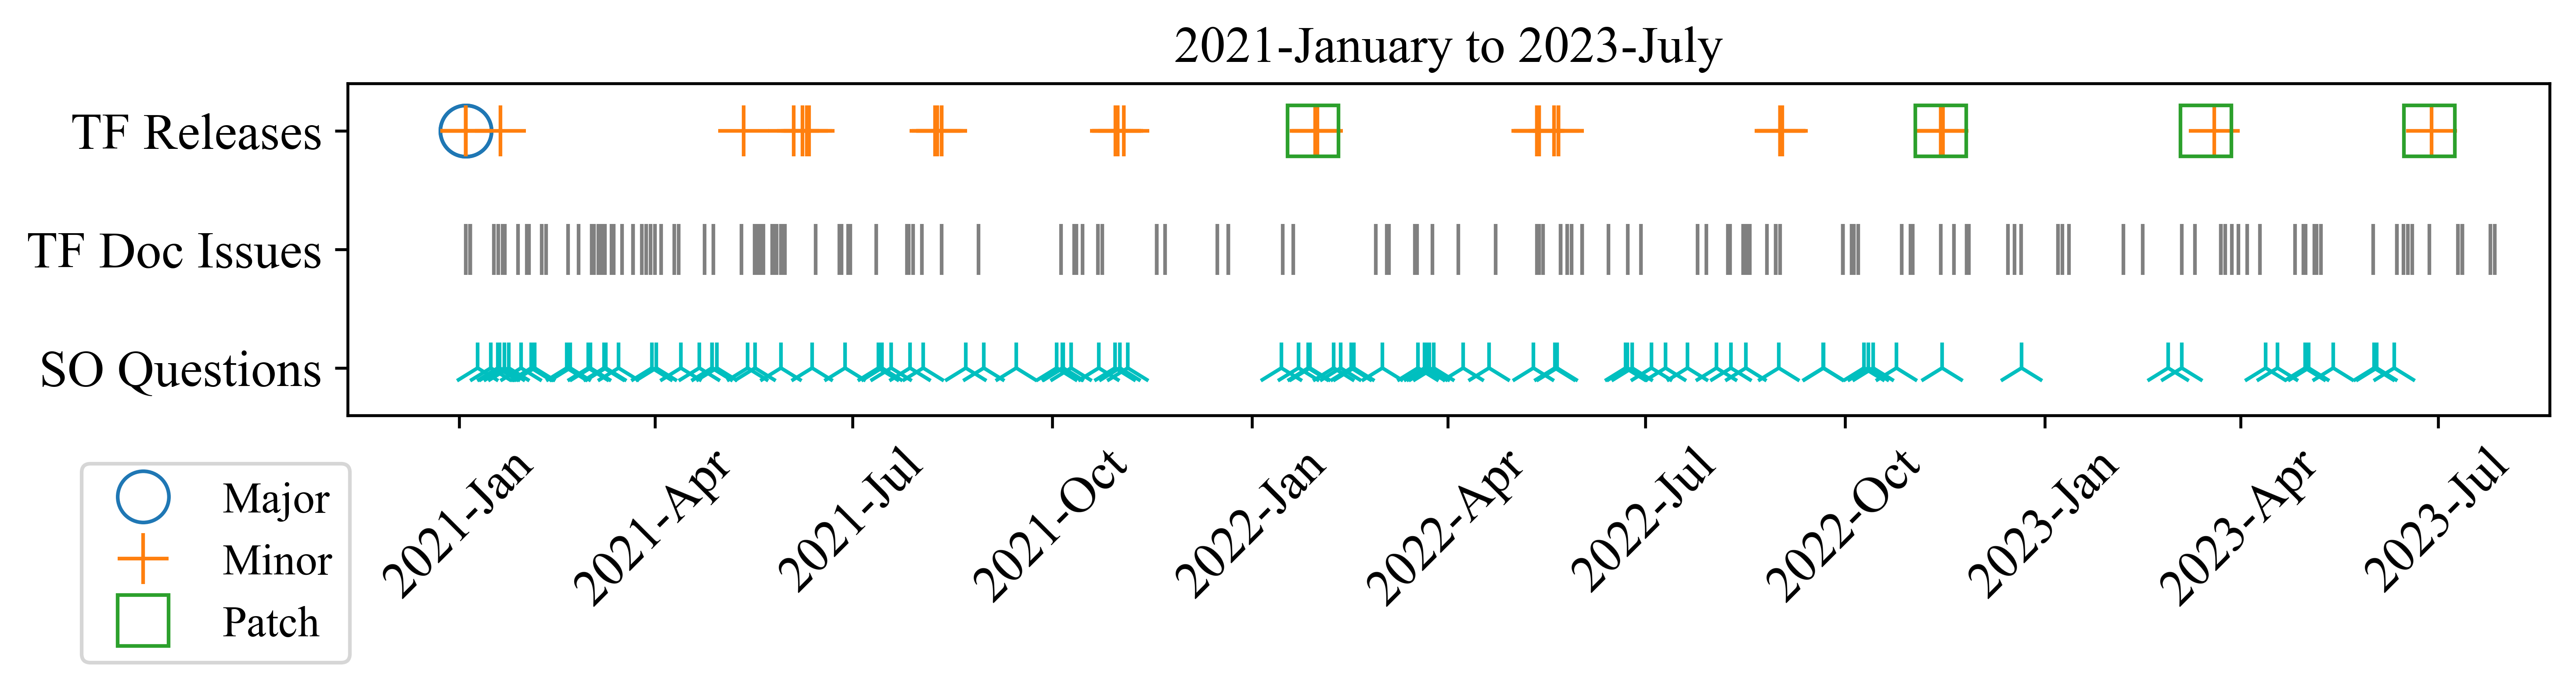

In [20]:
import pandas as pd
from matplotlib import dates as mdates
from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager

# Define marker based on release type
markers = {'Major': 'o', 'Minor': '+', 'Patch':'s'}

fig = plt.figure(figsize=(10, 6), dpi=600)
# fig, ax1 = plt.subplots(nrows=1, figsize=(10, 6))

# ax1 = fig.add_subplot(3, 1, 1)
# ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# # Plot the data points with markers
# for release_type, release_data1 in tf_releases1.groupby('Release Type'):
#     ax1.plot(release_data1['Date'], [2 for _ in range(len(release_data1))], marker=markers[release_type], linestyle='', label=release_type, markersize=8, markerfacecolor='none', markeredgewidth=1)

# second_dates1 = tf_issues1['Date Opened']
# ax1.plot(second_dates1, [1 for _ in range(len(second_dates1))], marker='|', linestyle='', color='gray', markersize=8, markerfacecolor='none', markeredgewidth=1)

# ques_dates1 = doc_related_question1['CreationDate']
# ax1.plot(ques_dates1, [0 for _ in range(len(ques_dates1))], marker='2', linestyle='', color='c', markersize=8, markerfacecolor='none', markeredgewidth=1)

# # Set x-axis limits and format ticks
# buffer = (tf_releases1['Date'].max() - tf_releases1['Date'].min()) * 0.05  # Add 5% buffer on each side
# ax1.set_xlim(tf_releases1['Date'].min() - buffer, tf_releases1['Date'].max() + buffer)
# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# ax1.set_title("2015-January to 2017-December")
# ax1.title.set_size(14)

# ax1.set_ylim(-0.4, 2.4)
# # Set y-axis ticks and labels manually
# ax1.set_yticks([0, 1, 2])
# ytick_labels = ax1.set_yticklabels(['SO Questions', 'TF Doc Issues', 'TF Releases'], color='black')  # Get label objects

# =================================================================================================================================================================================================

# Plot the data points with markers
# for release_type, release_data2 in tf_releases2.groupby('Release Type'):
#     ax2.plot(release_data2['Date'], [2 for _ in range(len(release_data2))], marker=markers[release_type], linestyle='', label=release_type, markersize=8, markerfacecolor='none', markeredgewidth=1)

# second_dates2 = tf_issues2['Date Opened']
# ax2.plot(second_dates2, [1 for _ in range(len(second_dates2))], marker='|', linestyle='', color='gray', markersize=8, markerfacecolor='none', markeredgewidth=1)

# ques_dates2 = doc_related_question2['CreationDate']
# ax2.plot(ques_dates2, [0 for _ in range(len(ques_dates2))], marker='2', linestyle='', color='c', markersize=8, markerfacecolor='none', markeredgewidth=1)

# # Set x-axis limits and format ticks
# buffer = (tf_releases2['Date'].max() - tf_releases2['Date'].min()) * 0.04  # Add 5% buffer on each side
# ax2.set_xlim(tf_releases2['Date'].min() - buffer, tf_releases2['Date'].max() + buffer)
# ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# ax2.set_title("2018-January to 2020-December")
# ax2.title.set_size(14)

# ax2.set_ylim(-0.4, 2.4)
# # Set y-axis ticks and labels manually
# ax2.set_yticks([0, 1, 2])
# ytick_labels = ax2.set_yticklabels(['SO Questions', 'TF Doc Issues', 'TF Releases'], color='black')  # Get label objects

# =================================================================================================================================================================================================

# Plot the data points with markers
for release_type, release_data3 in tf_releases3.groupby('Release Type'):
    ax3.plot(release_data3['Date'], [2 for _ in range(len(release_data3))], marker=markers[release_type], linestyle='', label=release_type, markersize=14, markerfacecolor='none', markeredgewidth=1)

second_dates3 = tf_issues3['Date Opened']
ax3.plot(second_dates3, [1 for _ in range(len(second_dates3))], marker='|', linestyle='', color='gray', markersize=14, markerfacecolor='none', markeredgewidth=1)

ques_dates3 = doc_related_question3['CreationDate']
ax3.plot(ques_dates3, [0 for _ in range(len(ques_dates3))], marker='2', linestyle='', color='c', markersize=14, markerfacecolor='none', markeredgewidth=1)

# Set x-axis limits and format ticks
# print(tf_releases3['Date'].max())
buffer = (tf_releases3['Date'].max() - tf_releases3['Date'].min()) * 0.06  # Add 5% buffer on each side
ax3.set_xlim(tf_releases3['Date'].min() - buffer, tf_releases3['Date'].max() + buffer)
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax3.set_xticklabels(ax3.get_xticks(), rotation = 45)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax3.set_title("2021-January to 2023-July")
ax3.title.set_size(14)


ax3.set_ylim(-0.4, 2.4)
# Set y-axis ticks and labels manually
ax3.set_yticks([0, 1, 2])
ytick_labels = ax3.set_yticklabels(['SO Questions', 'TF Doc Issues', 'TF Releases'], color='black')  # Get label objects


plt.xticks(rotation=45)
prop = font_manager.FontProperties(family="Times New Roman")
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 14

# Add legend
handles, labels = ax3.get_legend_handles_labels()
legend_prop = {'size': 12}
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.06, -0.08), prop=legend_prop)

plt.tight_layout()
plt.savefig(os.path.join(s.DATA_PATH, 'release_timeline.pdf'), format='pdf', bbox_inches='tight')
plt.show()
